***
# Spotify Songs Recommendation Engine

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import re
import numpy as np
import seaborn as sns

In [2]:
tracks_df=pd.read_csv("tracks.csv")

In [3]:
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
tracks_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


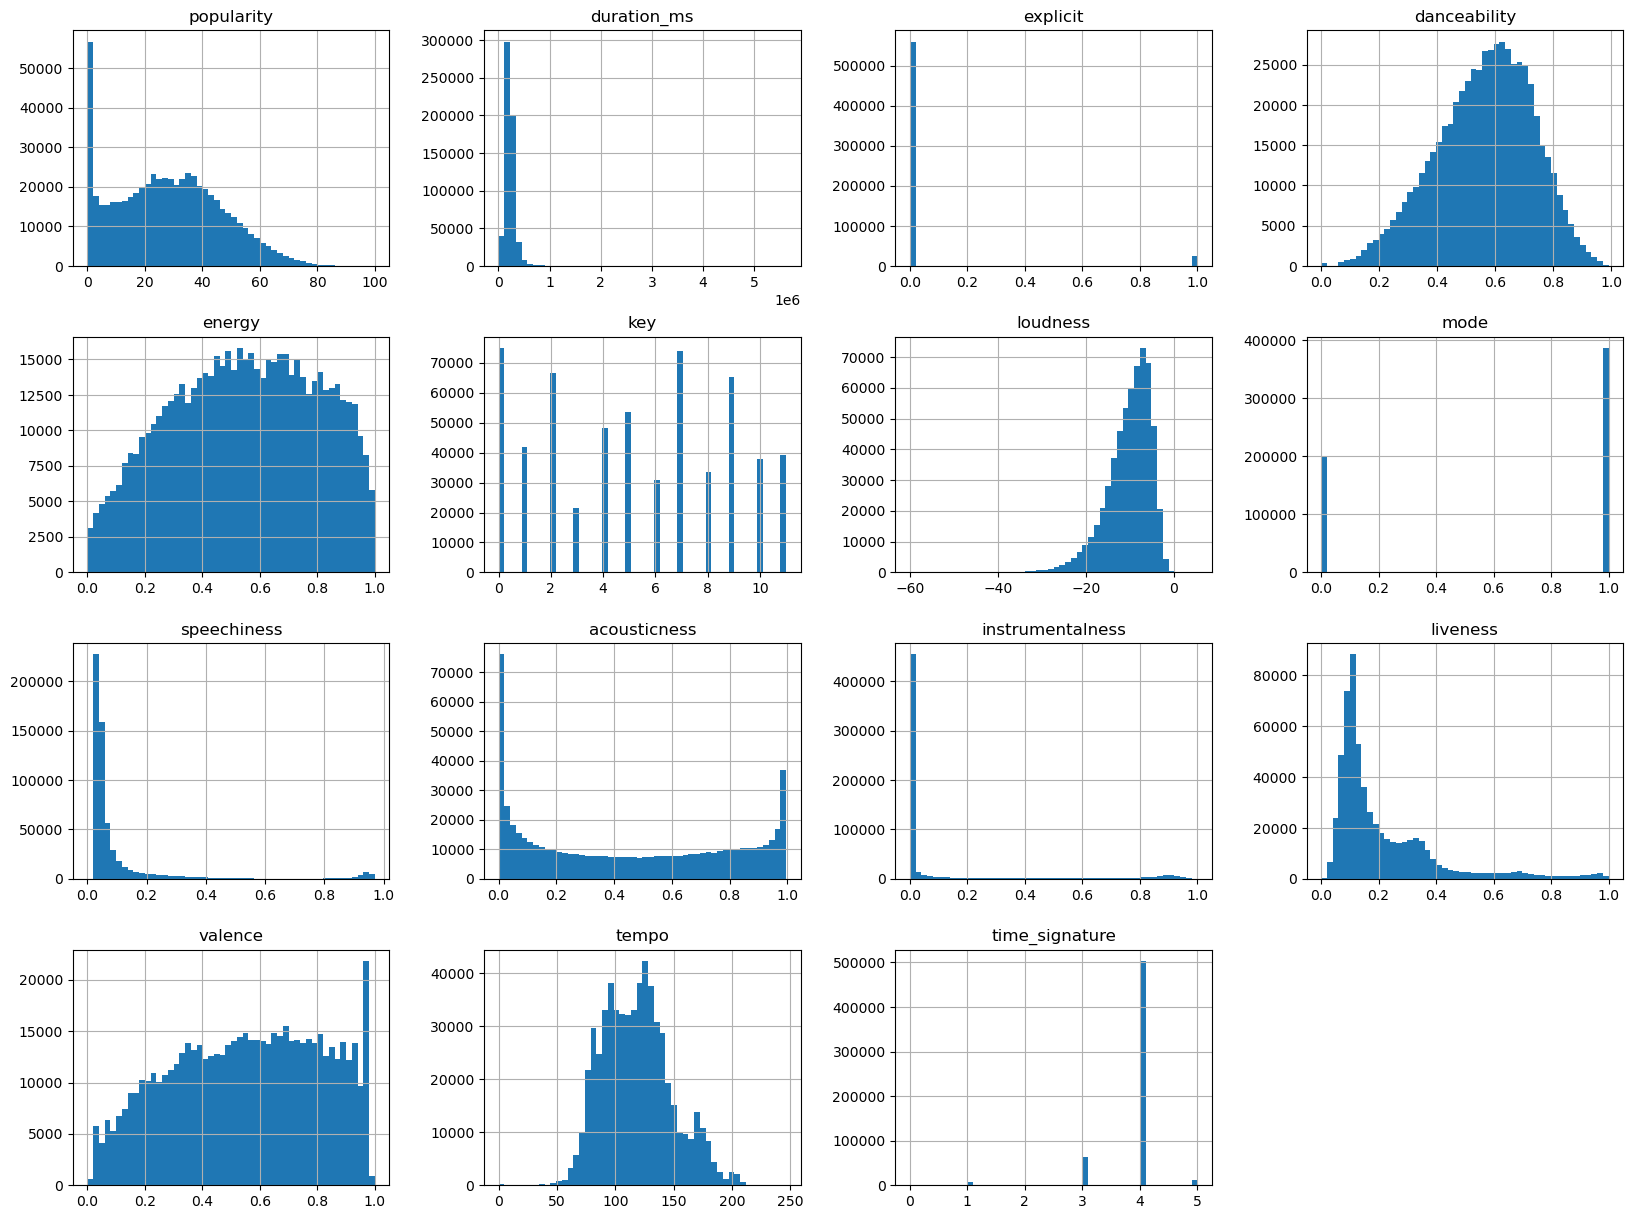

In [6]:
# Exploring the Distribution of Data
tracks_df.hist(bins=50, figsize=(20,15))
plt.show()

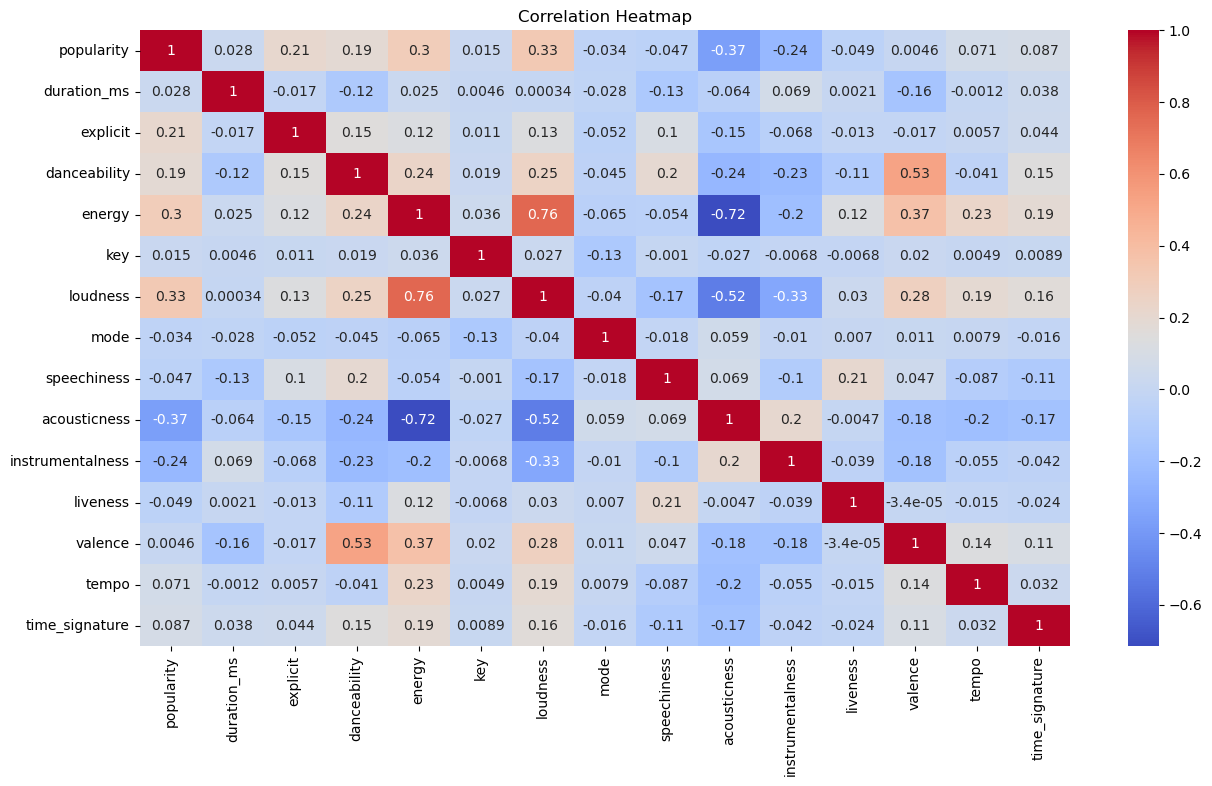

In [7]:
# Exploring Correlations between Features
plt.figure(figsize=(15, 8))

# Create a correlation matrix
correlation_matrix = tracks_df.corr(numeric_only=True)

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

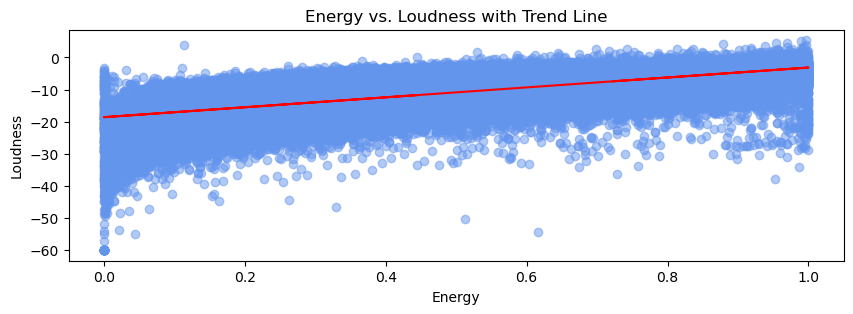

In [8]:
plt.figure(figsize=(10, 3))
# Extract the factors from the DataFrame
factor1 = tracks_df['energy']
factor2 = tracks_df['loudness']

# Create the scatter plot
plt.scatter(factor1, factor2, alpha=0.5,color='cornflowerblue')  # Adjust the alpha value for transparency

# Fit the trend line using NumPy's polyfit function
trendline = np.polyfit(factor1, factor2, 1)  # '1' represents a linear trendline

# Generate the predicted values for the trend line
predicted_values = np.polyval(trendline, factor1)

# Plot the trend line
plt.plot(factor1, predicted_values, color='red')

# Add labels and title to the plot
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Energy vs. Loudness with Trend Line')

# Display the plot
plt.show()

In [9]:
#  Exploring and Treating Null Values
def check_null(df):

    if df.isnull().values.any():
        print("The table contains missing values.")
    else:
        print("The table does not contain any missing values.")

    # Check if there are any missing values in each column
    if df.isnull().any().any():
        print("One or more columns contain missing values.")
    else:
        print("No columns contain missing values.")

    # Get the count of missing values in each column
    missing_values = df.isnull().sum()
    print("Missing values count in each column:")
    print(missing_values)
    
check_null(tracks_df)

The table contains missing values.
One or more columns contain missing values.
Missing values count in each column:
id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64


In [10]:
# Since there are have almost 600K rows of data, dropping these 71  rows (i.e. dropping 0.01% of population) will not render significant impact on our analysis and machine learning model.
tracks_df=tracks_df.dropna(subset=["name"])
check_null(tracks_df) # verify

The table does not contain any missing values.
No columns contain missing values.
Missing values count in each column:
id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64


In [11]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          58

In [12]:
# Data Cleaning & Feature Engineering
# Getting artist's genres

# Read
artist_df = pd.read_csv("artists.csv")

# Drop missing genres
artist_df = artist_df[artist_df.genres != "[]"]

# For simplicity, get top genre if multiple exists
artist_df["genres"] = artist_df.genres.map(lambda x: x.split(",")[0])

# Removing special characters
artist_df["genres"] = artist_df.genres.map(lambda x: "".join(c for c in x if c not in "()[]''"))

# Rename id to id_artist for consistency
artist_df.rename(columns={"id":"id_artists"},inplace=True)

# Selecting id_artists and genres only
artist_df = artist_df[["id_artists","genres"]]

In [13]:
# For simplicity, get top artist if multiple exists
tracks_df["id_artists"] = tracks_df.id_artists.map(lambda x: x.split(",")[0])

# Removing special characters
tracks_df["id_artists"] = tracks_df.id_artists.map(lambda x: "".join(c for c in x if c not in "()[]''"))

In [14]:
# Left join two dataframes on id_artists
master_df = tracks_df.merge(artist_df,how="left",on="id_artists")

# Replace missing genres with "none" string
master_df.genres.fillna('None', inplace=True)

In [15]:
# verify
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586600
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          58

In [16]:
# Grouping tracks into "eras"
# "release_date" is more useful if transformed into a datetime format and extract its year before grouping into "era" to better fit a training model:
def get_era(df):
    if df >= 2000:
        return ">2000s"
    else:
        return "19" + str(df%10*10) + "s"
    
master_df["release_date"] = pd.to_datetime(master_df["release_date"])
master_df["year"] = master_df["release_date"].dt.year
master_df["era"] = master_df["year"].apply(get_era) # getting the era

In [17]:
# Cleaning Invalid Data Types
# Converting faux numerical dtypes into categorical objects (i.e. explicit, mode, key and time_signature)
num_2_cat_list = ["explicit","mode","key","time_signature"]
for f in num_2_cat_list:
    master_df[f] = master_df[f].astype("str")

In [18]:
# Verify
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586600
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586601 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586601 non-null  int64         
 3   duration_ms       586601 non-null  int64         
 4   explicit          586601 non-null  object        
 5   artists           586601 non-null  object        
 6   id_artists        586601 non-null  object        
 7   release_date      586601 non-null  datetime64[ns]
 8   danceability      586601 non-null  float64       
 9   energy            586601 non-null  float64       
 10  key               586601 non-null  object        
 11  loudness          586601 non-null  float64       
 12  mode              586601 non-null  object        
 13  speechiness       586601 non-null  float64       
 14  acou

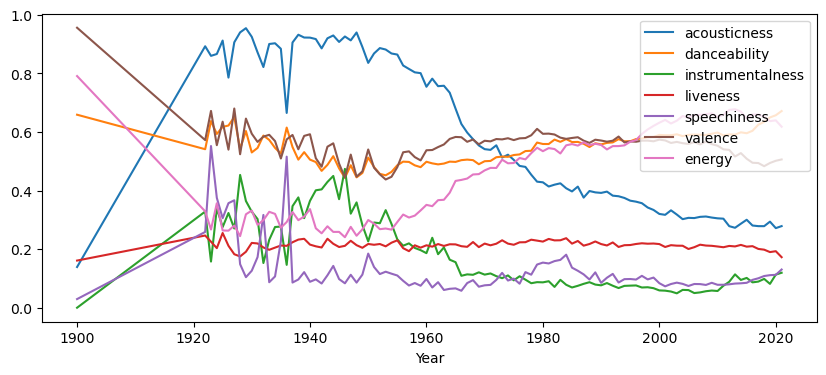

In [19]:
# Exploring Feature Trends Over Year
plt.figure(figsize=(10, 4))
master_df.groupby(['year'])['acousticness'].mean().plot(label='acousticness')
master_df.groupby(['year'])['danceability'].mean().plot(label='danceability')
master_df.groupby(['year'])['instrumentalness'].mean().plot(label='instrumentalness')
master_df.groupby(['year'])['liveness'].mean().plot(label='liveness')
master_df.groupby(['year'])['speechiness'].mean().plot(label='speechiness')
master_df.groupby(['year'])['valence'].mean().plot(label='valence')
master_df.groupby(['year'])['energy'].mean().plot(label='energy')
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.show()

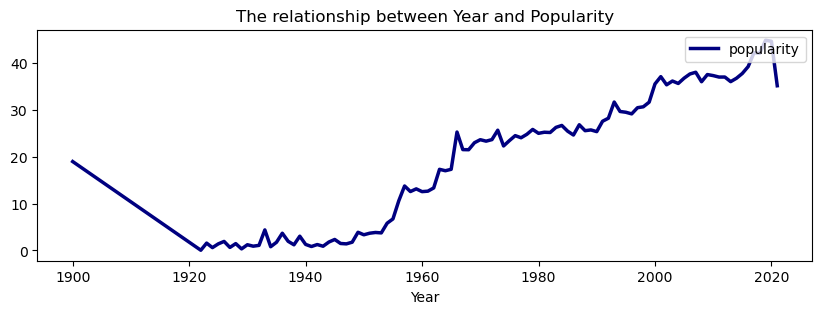

In [20]:
plt.figure(figsize=(10, 3))

master_df.groupby(['year'])['popularity'].mean().plot(label='popularity',color='navy',linewidth=2.5)
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.title('The relationship between Year and Popularity')
plt.show()

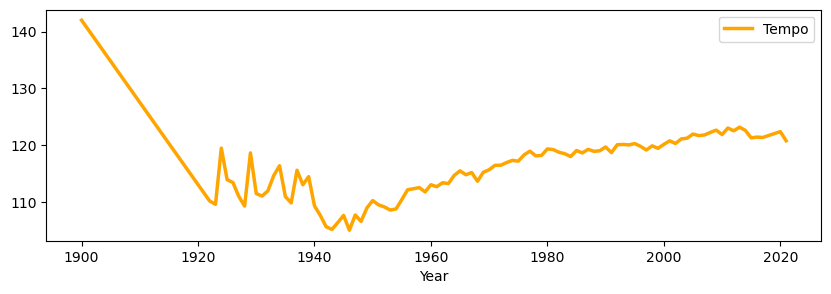

In [21]:
plt.figure(figsize=(10, 3))

master_df.groupby(['year'])['tempo'].mean().plot(label='Tempo',color='orange',linewidth=2.5)
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.show()

In [22]:
#Based on trendline, there appears to be anomaly for tracks older than 1920. Investigate:
master_df[master_df["year"]<1920]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres,year,era
478626,74CSJTE5QQp1e4bHzm3wti,Maldita sea la primera vez,19,233920,0,['Los Pincheira del Sur'],1BnQrx8p0bHBpidjIGq26z,1900-01-01,0.659,0.791,...,0.0295,0.139,0.000002,0.161,0.956,141.999,4,cumbia ranchera,1900,190s


In [23]:
# Dropping since only one song outside of range:
master_df = master_df[master_df["year"]>=1920]

# verify
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586600 entries, 0 to 586600
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586600 non-null  object        
 1   name              586600 non-null  object        
 2   popularity        586600 non-null  int64         
 3   duration_ms       586600 non-null  int64         
 4   explicit          586600 non-null  object        
 5   artists           586600 non-null  object        
 6   id_artists        586600 non-null  object        
 7   release_date      586600 non-null  datetime64[ns]
 8   danceability      586600 non-null  float64       
 9   energy            586600 non-null  float64       
 10  key               586600 non-null  object        
 11  loudness          586600 non-null  float64       
 12  mode              586600 non-null  object        
 13  speechiness       586600 non-null  float64       
 14  acou

Unsupervised Learning Model using K-Means Clustering

Observations from EDA:
- Usable numerical data (i.e. based on histograms) that are not normalized may need to transfrom to have a more symmetrical and bell-shaped distributions.
- Non-usable data will be dropped.
- All null values have been treated and therefore no need for imputations.

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans

In [25]:
# pipeline (normalize then train)
kmeans_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=200, 
                                   verbose=False,n_init="auto"))
                                 ], verbose=False)

# slice only numerical columns
kmeans_X = master_df.select_dtypes(np.number)

# get the names of the sliced columns
kmeans_X_cols = list(kmeans_X.columns)

# train
kmeans_pipeline.fit(kmeans_X)

# predict
kmeans_predicted_labels = kmeans_pipeline.predict(kmeans_X)

# label
kmeans_master_df = master_df
kmeans_master_df['kmeans_label'] = kmeans_predicted_labels

In [26]:
# Converting target data type to categorical
kmeans_master_df['kmeans_label']=kmeans_master_df['kmeans_label'].astype("object")

In [27]:
kmeans_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586600 entries, 0 to 586600
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586600 non-null  object        
 1   name              586600 non-null  object        
 2   popularity        586600 non-null  int64         
 3   duration_ms       586600 non-null  int64         
 4   explicit          586600 non-null  object        
 5   artists           586600 non-null  object        
 6   id_artists        586600 non-null  object        
 7   release_date      586600 non-null  datetime64[ns]
 8   danceability      586600 non-null  float64       
 9   energy            586600 non-null  float64       
 10  key               586600 non-null  object        
 11  loudness          586600 non-null  float64       
 12  mode              586600 non-null  object        
 13  speechiness       586600 non-null  float64       
 14  acou

In [28]:
kmeans_master_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres,year,era,kmeans_label
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,...,0.674,0.7440,0.151,0.127,104.851,3,None,1922,1920s,24
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,...,0.797,0.0000,0.148,0.655,102.009,1,None,1922,1920s,64
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,...,0.994,0.0218,0.212,0.457,130.418,5,tango,1922,1920s,112
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,...,0.995,0.9180,0.104,0.397,169.980,3,tango,1922,1920s,4
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922-01-01,0.402,0.1580,...,0.989,0.1300,0.311,0.196,103.220,4,adult standards,1922,1920s,106


K-Nearest Neighbours

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [29]:
knn_master_df=kmeans_master_df.copy(deep=True)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [31]:
# drop features not used
features_2_drop = ['id','name','artists','id_artists','release_date','year']
knn_master_df.drop(knn_master_df.iloc[:,:-1].select_dtypes([np.datetime64,object]),axis=1,inplace=True)
knn_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586600 entries, 0 to 586600
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        586600 non-null  int64  
 1   duration_ms       586600 non-null  int64  
 2   danceability      586600 non-null  float64
 3   energy            586600 non-null  float64
 4   loudness          586600 non-null  float64
 5   speechiness       586600 non-null  float64
 6   acousticness      586600 non-null  float64
 7   instrumentalness  586600 non-null  float64
 8   liveness          586600 non-null  float64
 9   valence           586600 non-null  float64
 10  tempo             586600 non-null  float64
 11  year              586600 non-null  int64  
 12  kmeans_label      586600 non-null  object 
dtypes: float64(9), int64(3), object(1)
memory usage: 62.7+ MB


In [32]:


import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline



from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

# Load the Iris dataset (or use your own dataset)
data=knn_master_df
X = knn_master_df.iloc[:,:-1]
X = scaler.fit_transform(X)
pca = PCA(n_components=3)
X=pca.fit_transform(X)

y = knn_master_df["kmeans_label"]
y=y.astype('int')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


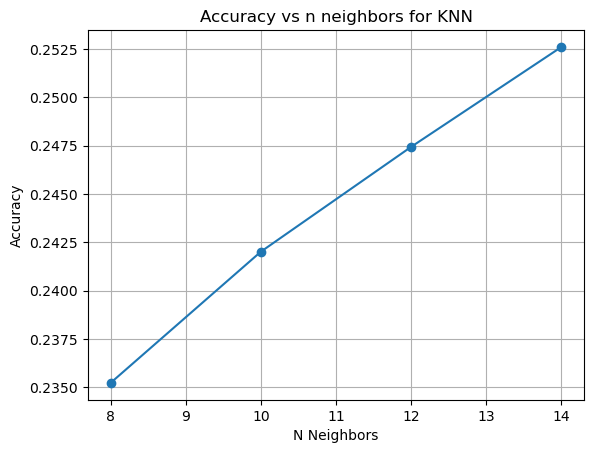

In [33]:
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

n_neighbors = [8,10,12,14]
accuracies_knn = []

for n_neighbor in n_neighbors:
    # Train the classifier
    clf = KNeighborsClassifier(n_neighbors=n_neighbor,weights='distance')
    clf.fit(X_train, y_train)
    
    # Predict the test set results
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_knn.append(accuracy)

plt.plot(n_neighbors, accuracies_knn, marker='o')
plt.title('Accuracy vs n neighbors for KNN')
plt.xlabel('N Neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [34]:
# Decision Tree
# Make a copy
tree_master_df = kmeans_master_df.copy(deep=True)

# Drop features not used
features_2_drop = ['id','name','artists','id_artists','release_date','year']
tree_master_df.drop(tree_master_df.iloc[:,:-1].select_dtypes([np.datetime64,object]),axis=1,inplace=True)
tree_master_df.info()

# Split into test and train
tree_X = tree_master_df.iloc[:,:-1]
tree_y = tree_master_df["kmeans_label"]

from sklearn.model_selection import train_test_split
tree_X_train, tree_X_test, tree_y_train, tree_y_test = train_test_split(tree_X,tree_y,test_size=0.2,random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586600 entries, 0 to 586600
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        586600 non-null  int64  
 1   duration_ms       586600 non-null  int64  
 2   danceability      586600 non-null  float64
 3   energy            586600 non-null  float64
 4   loudness          586600 non-null  float64
 5   speechiness       586600 non-null  float64
 6   acousticness      586600 non-null  float64
 7   instrumentalness  586600 non-null  float64
 8   liveness          586600 non-null  float64
 9   valence           586600 non-null  float64
 10  tempo             586600 non-null  float64
 11  year              586600 non-null  int64  
 12  kmeans_label      586600 non-null  object 
dtypes: float64(9), int64(3), object(1)
memory usage: 62.7+ MB


In [35]:
# algorithm imports 
import sklearn

# make copy of data
tree_X_train = tree_X_train.values
tree_y_train = tree_y_train.astype("int32")
tree_X_test = tree_X_test.values
tree_y_test = tree_y_test.astype("int32")

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

tree_pipeline = Pipeline([
    ("tree",DecisionTreeClassifier(random_state=42)),
    ])

tree_param_grid = [{
    "tree__max_depth":[10,12,14],
}]

tree_grid_search = GridSearchCV(tree_pipeline, tree_param_grid, cv=3,scoring="neg_root_mean_squared_error")

In [37]:
# Train and fine-tuning model
tree_grid_search.fit(tree_X_train,tree_y_train)
tree_grid_search.best_params_

{'tree__max_depth': 14}

In [38]:
from sklearn.metrics import accuracy_score

depths = [16,18,20,22]
accuracies = []

In [39]:
for depth in depths:
    # Train the classifier
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(tree_X_train, tree_y_train)
    
    # Predict the test set results
    tree_y_pred = clf.predict(tree_X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(tree_y_test, tree_y_pred)
    accuracies.append(accuracy)

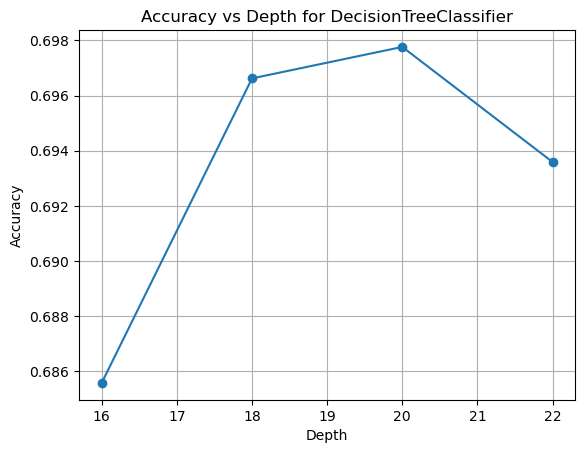

In [40]:
plt.plot(depths, accuracies, marker='o')
plt.title('Accuracy vs Depth for DecisionTreeClassifier')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [55]:
# Train using best hyperparameter
tree_best = DecisionTreeClassifier(max_depth=20,random_state=42)

tree_best.fit(tree_X_train,tree_y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

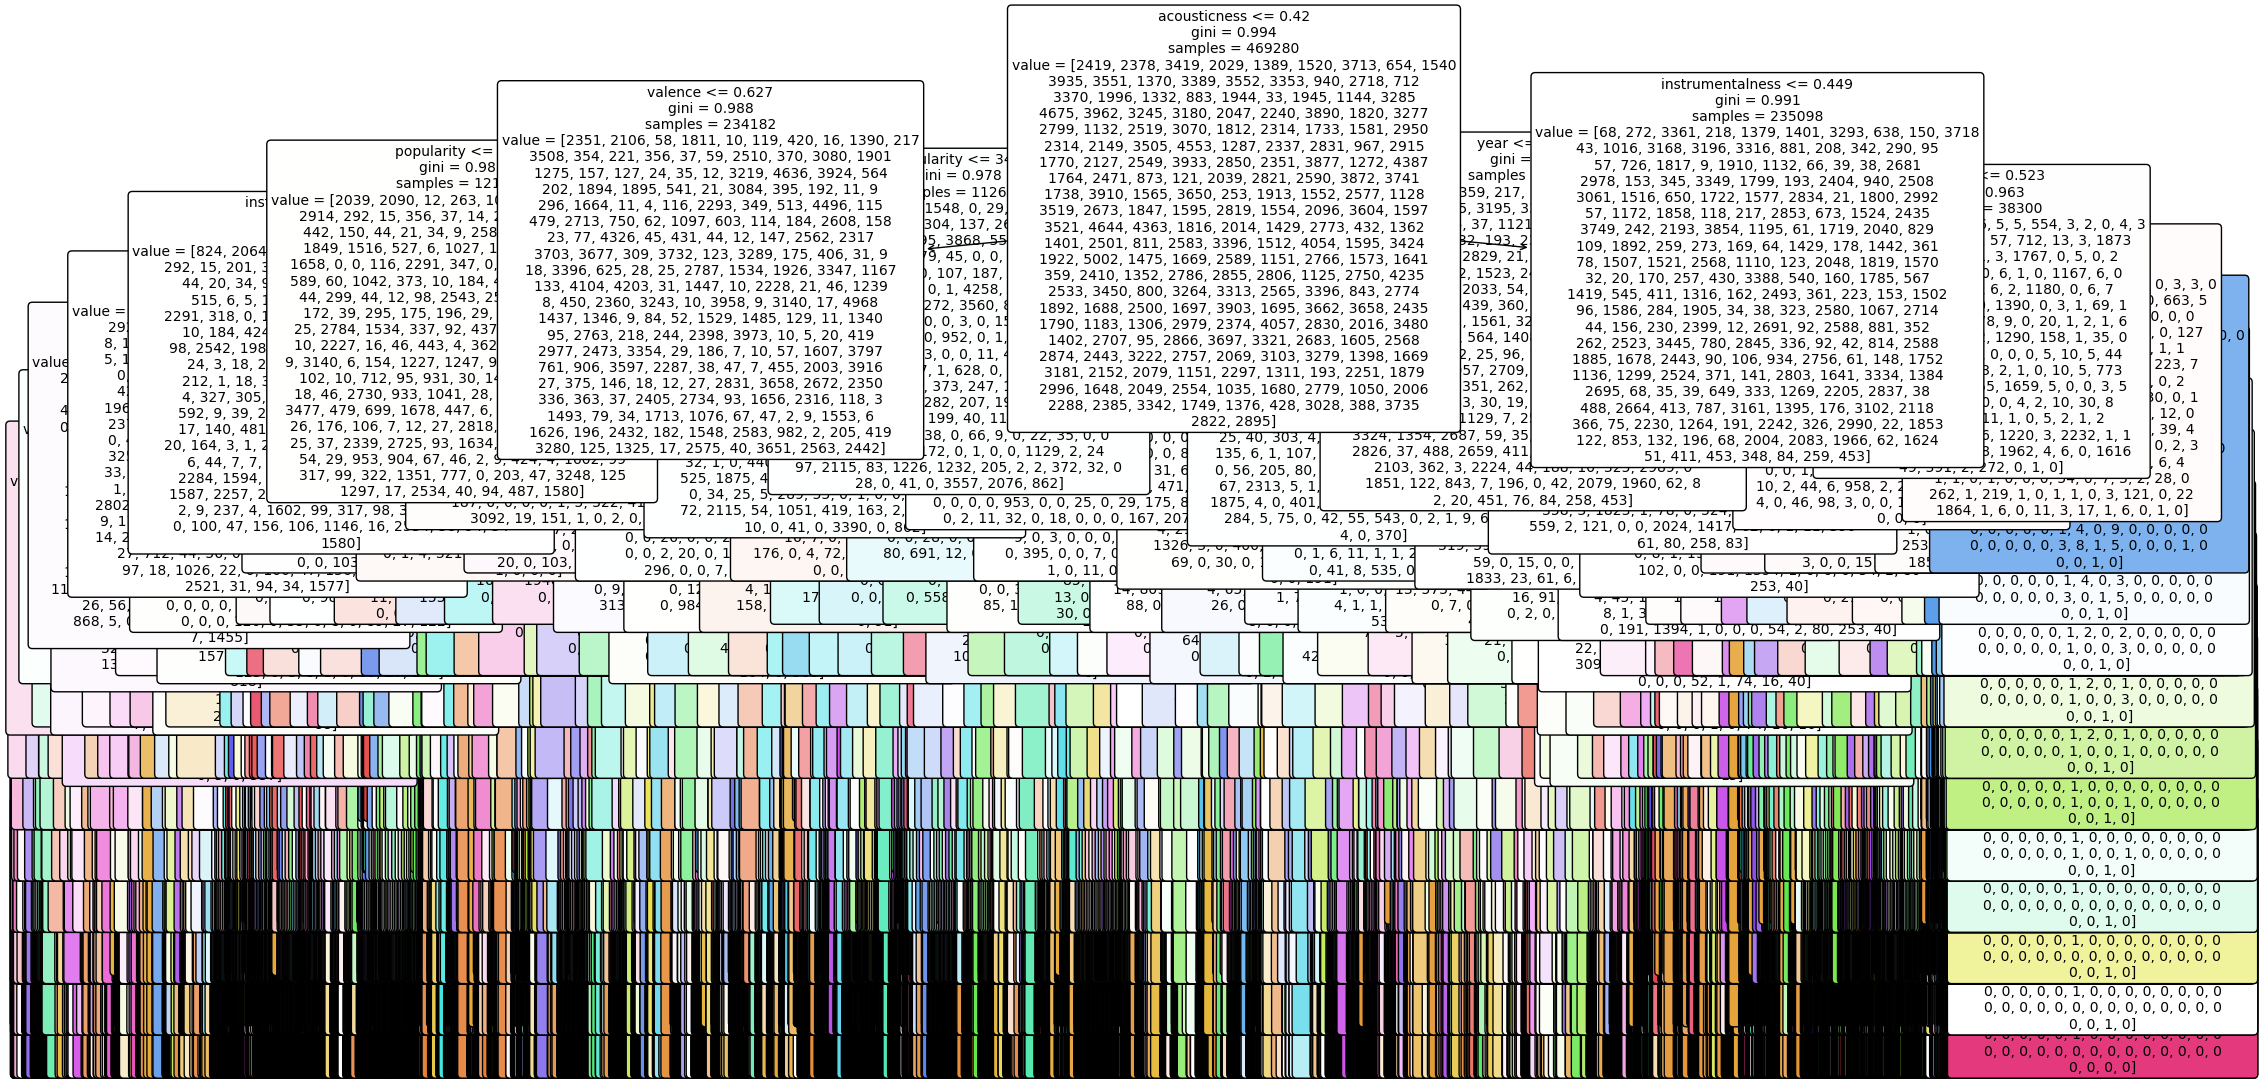

In [42]:
plt.figure(figsize=(25, 10))
plot_tree(tree_best, 
          #class_names=True,
          #class_names=tree_y_train, # list classes in ascending numerical order
          feature_names=tree_X.columns,
          filled=True, 
          rounded=True,
          fontsize=10,
          label='all');

In [43]:
tree_X

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
0,6,126903,0.645,0.4450,-13.338,0.4510,0.674,0.744000,0.1510,0.1270,104.851,1922
1,0,98200,0.695,0.2630,-22.136,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1922
2,0,181640,0.434,0.1770,-21.180,0.0512,0.994,0.021800,0.2120,0.4570,130.418,1922
3,0,176907,0.321,0.0946,-27.961,0.0504,0.995,0.918000,0.1040,0.3970,169.980,1922
4,0,163080,0.402,0.1580,-16.900,0.0390,0.989,0.130000,0.3110,0.1960,103.220,1922
...,...,...,...,...,...,...,...,...,...,...,...,...
586596,50,258267,0.560,0.5180,-7.471,0.0292,0.785,0.000000,0.0648,0.2110,131.896,2020
586597,72,153293,0.765,0.6630,-5.223,0.0652,0.141,0.000297,0.0924,0.6860,150.091,2020
586598,70,187601,0.535,0.3140,-12.823,0.0408,0.895,0.000150,0.0874,0.0663,145.095,2020
586599,58,142003,0.696,0.6150,-6.212,0.0345,0.206,0.000003,0.3050,0.4380,90.029,2021


In [44]:
tree_y_pred = tree_best.predict(tree_X_test)

In [45]:
# CLASSIFICATION METRICS - EVALUATING DECISION TREE'S PERFORMANCE
from sklearn.metrics import mean_squared_error,accuracy_score, precision_score,recall_score,f1_score # Allen added

# RMSE
tree_mse = mean_squared_error(tree_y_test, tree_y_pred)
tree_rmse = np.sqrt(tree_mse)

# Accuracy
tree_accuracy = accuracy_score(tree_y_test, tree_y_pred)*100

# Precision
tree_precision = precision_score(tree_y_test, tree_y_pred,average="weighted")*100

# Recall
tree_recall = recall_score(tree_y_test, tree_y_pred,average="weighted")*100

# F-Score
tree_f1score = f1_score(tree_y_test, tree_y_pred,average="weighted")*100

Random Forest

Building an ensemble of decision trees, trained via bagging method.

In [46]:
# make a copy
rf_master_df = kmeans_master_df.copy(deep=True)

# drop features not used
features_2_drop = ['id','name','artists','id_artists','release_date','year']
rf_master_df.drop(rf_master_df.iloc[:,:-1].select_dtypes([np.datetime64,object]),axis=1,inplace=True)
rf_master_df.kmeans_label = rf_master_df.kmeans_label.astype("int32")
rf_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586600 entries, 0 to 586600
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        586600 non-null  int64  
 1   duration_ms       586600 non-null  int64  
 2   danceability      586600 non-null  float64
 3   energy            586600 non-null  float64
 4   loudness          586600 non-null  float64
 5   speechiness       586600 non-null  float64
 6   acousticness      586600 non-null  float64
 7   instrumentalness  586600 non-null  float64
 8   liveness          586600 non-null  float64
 9   valence           586600 non-null  float64
 10  tempo             586600 non-null  float64
 11  year              586600 non-null  int64  
 12  kmeans_label      586600 non-null  int32  
dtypes: float64(9), int32(1), int64(3)
memory usage: 60.4 MB


In [47]:
# Split into test and train
rf_X = rf_master_df.iloc[:,:-1]
rf_y = rf_master_df["kmeans_label"]

from sklearn.model_selection import train_test_split
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(rf_X,rf_y,test_size=0.2,random_state=42)

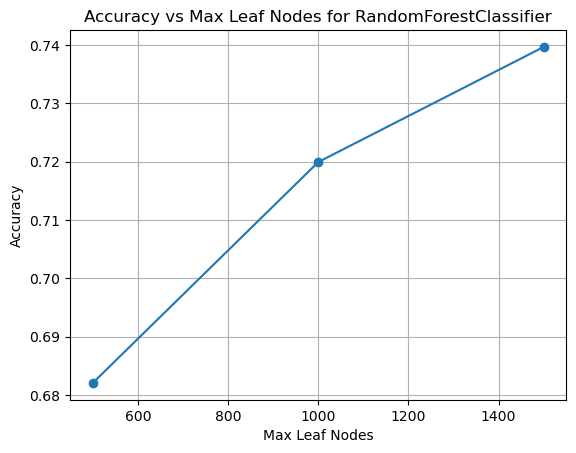

In [48]:
#Allen added
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier #Allen added
from sklearn.metrics import accuracy_score

leaf_nodes = [500,1000,1500]
accuracies_forest = []

for nodes in leaf_nodes:
    # Train the classifier
    clf = RandomForestClassifier(max_leaf_nodes=nodes, random_state=42, n_jobs=1)
    clf.fit(tree_X_train, tree_y_train)
    
    # Predict the test set results
    tree_y_pred = clf.predict(tree_X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(tree_y_test, tree_y_pred)
    accuracies_forest.append(accuracy)

plt.plot(leaf_nodes, accuracies_forest, marker='o')
plt.title('Accuracy vs Max Leaf Nodes for RandomForestClassifier')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [49]:
# Train using best hyperparameter
rf_best = RandomForestClassifier(max_leaf_nodes=1500,n_jobs=1,random_state=42)
rf_best.fit(rf_X_train,rf_y_train)

RandomForestClassifier(max_leaf_nodes=1500, n_jobs=1, random_state=42)

In [50]:
rf_y_pred = rf_best.predict(rf_X_test)

### Conclusion:

Based on the accuracy chart of each model, Random Forest classifer appears to have the best result overall however it does not necessarily have a high enough score to be realiable.

If we keep increase Max Leaf Nodes, potentially we can get the accuracy even better, however it reaches the limit of our PC since it takes signaficantly longer to run codes if we keep increasing.

### Future considerations:

Although these models are far from perfection, they do have some degree of ability to predict and recommend tracks that is suitable to the input song vibe. Therefore for future studies, the potential future project should explore the following options:
- Incorporate PCA into Decision Tree and Random Forecast models
- Reinforcement Learning coupled with NLP ; &
- Access to more data and having a stronger compute power.

In [51]:
# Building the Recommendation Engine
def input_artist_track():
    """
    Input: artist and track name (str)
    Output: Spotify Track ID (str)
    """
    
    # input track name
    artist_name = input("Artist's Name: ")
    track_name = input("Artist's Track Name: ")

    # search track id
    q ='artist:' + artist_name + ' track:' + track_name
    track_id = sp.search(artist_name, type='track')
    return track_id.get("tracks").get("items")[0].get("id")

def get_track_features(input_id):
    """
    Input: Track ID (str)
    Output: Track features (DataFrame)
    """
    
    from datetime import datetime
    metadata = sp.track(input_id)
    features = sp.audio_features(input_id)

    # scrape
    popularity = metadata['popularity']
    length = metadata['duration_ms']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    acousticness = features[0]['acousticness']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    valence = features[0]['valence']
    tempo = features[0]['tempo']
    release_date = metadata['album']['release_date']
    year = datetime.strptime(release_date, '%Y-%m-%d').year
    
    # export to dataframe
    track_features = [popularity, length, danceability, energy, loudness,
       speechiness, acousticness, instrumentalness, liveness,
       valence, tempo, year]
    track_metadata = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
           'speechiness', 'acousticness', 'instrumentalness', 'liveness',
           'valence', 'tempo', 'year']
    
    track_dict = dict(zip(track_metadata, track_features))
    track_df = pd.DataFrame.from_dict([track_dict])

    return track_df

def predict_n_recommend(df,data=kmeans_master_df):
    """
    Input: Track features (DataFrame)
    Output: 100 songs (DataFrame)
    """
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # predict cluster label
    track_df_labels = int(rf_best.predict(df)//1)

    # get all songs from predicted cluster
    rf_recommendation = data[data.kmeans_label==track_df_labels][["artists","name","genres","era","popularity"]]

    # rename columns
    rf_recommended_cleaned_list = rf_recommendation.set_axis(["Artists","Track","Genres","Era","Popularity"],axis=1,copy=True)

    # reset index
    rf_recommended_cleaned_list.reset_index(drop=["index"],inplace=True)

    # remove dupes
    rf_recommended_cleaned_list.drop_duplicates(inplace=True)

    # titling genres
    rf_recommended_cleaned_list["Genres"] = rf_recommended_cleaned_list["Genres"].map(lambda x:x.title())

    # replace special char in artists
    rf_recommended_cleaned_list["Artists"] = rf_recommended_cleaned_list["Artists"].map(lambda x:x.replace("'",""))
    rf_recommended_cleaned_list["Artists"] = rf_recommended_cleaned_list["Artists"].map(lambda x:x.replace("[",""))
    rf_recommended_cleaned_list["Artists"] = rf_recommended_cleaned_list["Artists"].map(lambda x:x.replace("]",""))

    # recommend random 10 songs
    rf_top10 = rf_recommended_cleaned_list.sort_values("Popularity",ascending=False).iloc[:100].sample(10)
    rf_top10.drop("Popularity",axis=1,inplace=True)
    rf_top10.reset_index(drop=["index"],inplace=True)
    
    return rf_top10

In [52]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

# Establish connection to spotify using api
cid = "cd975ee3b1da43b5a2f713a636e74eff"
secret = "64a59c437c43438c955760738f3465a7"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [53]:
def rf_spotify_song_recommendation():
    # input artist and track
    track_id = input_artist_track()
    
    # get track features
    track_df = get_track_features(track_id)
    
    # recommend
    rf_10_playlist = predict_n_recommend(track_df)
    
    return rf_10_playlist

In [54]:
# Demonstration
rf_spotify_song_recommendation()

Artist's Name: Justin Timberlake
Artist's Track Name: Sexyback


,Artists,Track,Genres,Era
0,Calvin Harris,Summer,Dance Pop,>2000s
1,"Internet Money, Gunna, Don Toliver, NAV","Lemonade (feat. Gunna, Don Toliver & NAV)",Pop Rap,>2000s
2,"Wallows, Clairo",Are You Bored Yet? (feat. Clairo),Indie Pop,>2000s
3,"Bizarrap, L-Gante","L-Gante: Bzrp Music Sessions, Vol.38",Argentine Hip Hop,>2000s
4,"Calvin Harris, Dua Lipa",One Kiss (with Dua Lipa),Dance Pop,>2000s
5,"Ofenbach, Quarterhead, Norma Jean Martine",Head Shoulders Knees & Toes (feat. Norma Jean ...,Edm,>2000s
6,"Doja Cat, SZA",Kiss Me More (feat. SZA),Dance Pop,>2000s
7,"Dua Lipa, DaBaby",Levitating (feat. DaBaby),Dance Pop,>2000s
8,"Gym Class Heroes, Adam Levine",Stereo Hearts (feat. Adam Levine),Dance Pop,>2000s
9,Jason Derulo,Take You Dancing,Dance Pop,>2000s


***
# End